In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
os.listdir()

['.ipynb_checkpoints',
 '1_Displacement_Data',
 '1_Displacement_Data-20190905T050049Z-001.zip',
 '2_Violent_Conflict_data',
 '2_Violent_Conflict_data-20190905T050111Z-001.zip',
 '3 - Other_ OCHA HDX portal datasets',
 '3 - Other_ OCHA HDX portal datasets-20190905T050127Z-001.zip',
 'initial analysis.ipynb']

In [3]:
displacement_df = pd.read_excel("1_Displacement_Data/UNHCR-PRMN-Displacement-Dataset.xlsx")

In [4]:
displacement_df.head()

,Month End,Year Week,Current (Arrival) Region,Current (Arrival) District,Previous (Departure) Region,Previous (Departure) District,Reason,Current (Arrival) Priority Need,Number of Individuals
0,31/01/2016,201601,Awdal,Borama,Bakool,Tayeeglow,Drought related,Livelihood Support,7
1,31/01/2016,201601,Awdal,Borama,Banadir,Banadir,Drought related,Livelihood Support,7
2,31/01/2016,201602,Awdal,Borama,Banadir,Banadir,Drought related,Livelihood Support,8
3,31/01/2016,201604,Awdal,Borama,Banadir,Banadir,Drought related,Livelihood Support,5
4,31/01/2016,201604,Awdal,Borama,Banadir,Banadir,Drought related,Livelihood Support,6


In [5]:
displacement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34812 entries, 0 to 34811
Data columns (total 9 columns):
Month End                          34812 non-null object
Year Week                          34812 non-null int64
Current (Arrival) Region           34812 non-null object
Current (Arrival) District         34812 non-null object
Previous (Departure) Region        34812 non-null object
Previous (Departure) District      34812 non-null object
Reason                             34812 non-null object
Current (Arrival) Priority Need    34812 non-null object
Number of Individuals              34812 non-null int64
dtypes: int64(2), object(7)
memory usage: 2.4+ MB


- Dataset is pretty clean.

### [Q1] What is the major displacement reason?

In [6]:
displacement_df.Reason.value_counts()

Drought related        22732
Conflict/Insecurity     8355
Other                   2971
Flood                    754
Name: Reason, dtype: int64

In [7]:
displace_reason = displacement_df.Reason.value_counts(normalize=True)

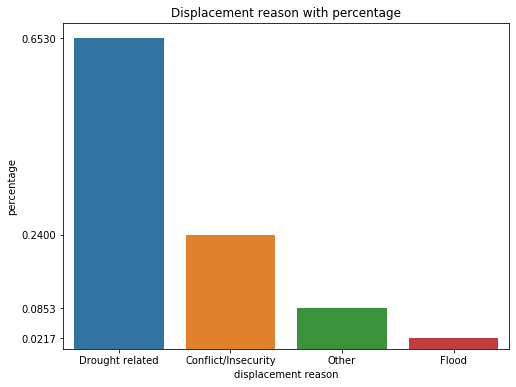

In [8]:
plt.figure(figsize=(8,6))
sns.barplot(displace_reason.keys(), displace_reason.values);
plt.yticks(displace_reason.values);
plt.xlabel("displacement reason");
plt.ylabel("percentage");
plt.title("Displacement reason with percentage");

- 65.30% people displaced because of Drought related reasons.
- 24% people displaced because of Confilect/insecurity reasons.
- 2.17% people displaced becasue of floods.
- 8.53% people displaced because of other reasons.

#### [sol1]- Drought and conflict are the two main reasons responsible for nearly 89.30% displacement.

### [Q2] From which district people are migrating more?

In [9]:
displacement_df.groupby(['Previous (Departure) District']).sum()['Number of Individuals'].sort_values(ascending=False)

Previous (Departure) District
Marka           266999
Baidoa          212540
Kurtunwaarey    146866
Belet Weyne     143672
Afgooye         143008
                 ...  
Gebiley           2155
Ceel Dheer        1967
Lasqoray          1352
Sheikh             907
Badhaadhe          778
Name: Number of Individuals, Length: 77, dtype: int64

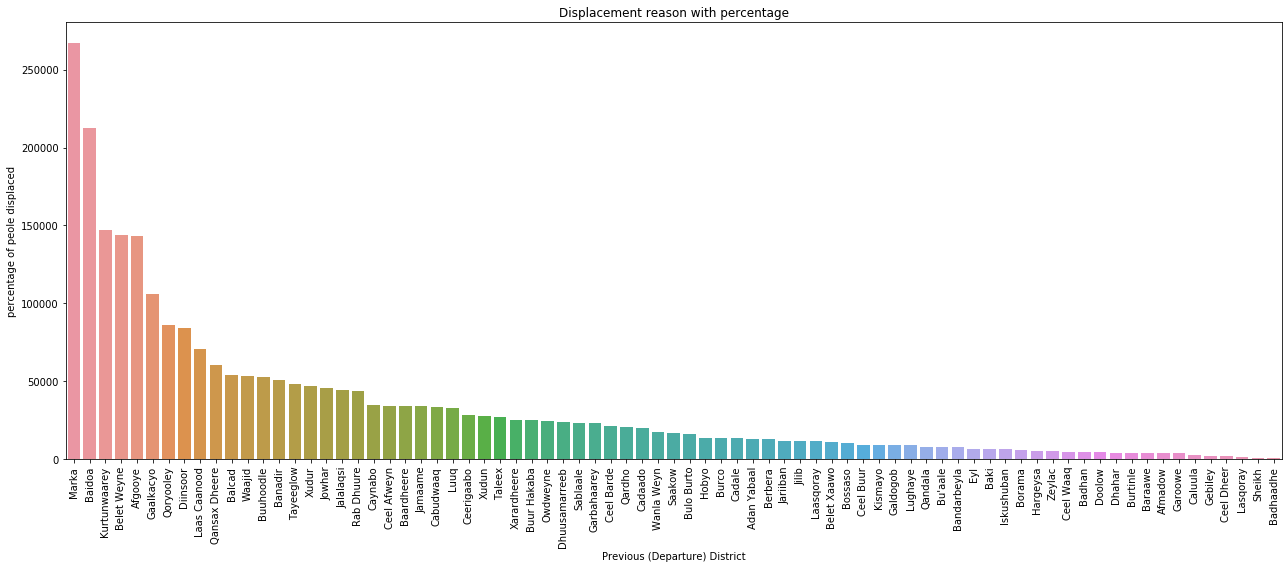

In [11]:
diparture_districts = displacement_df.groupby(['Previous (Departure) District']).sum()['Number of Individuals'].sort_values(ascending=False)
plt.figure(figsize=(18,8))
sns.barplot(diparture_districts.keys(), diparture_districts.values);
plt.xticks(rotation=90)
plt.ylabel("percentage of peole displaced");
plt.title("Displacement reason with percentage");
plt.tight_layout()

In [12]:
dipart_dist_percent =  diparture_districts.values/diparture_districts.values.sum()

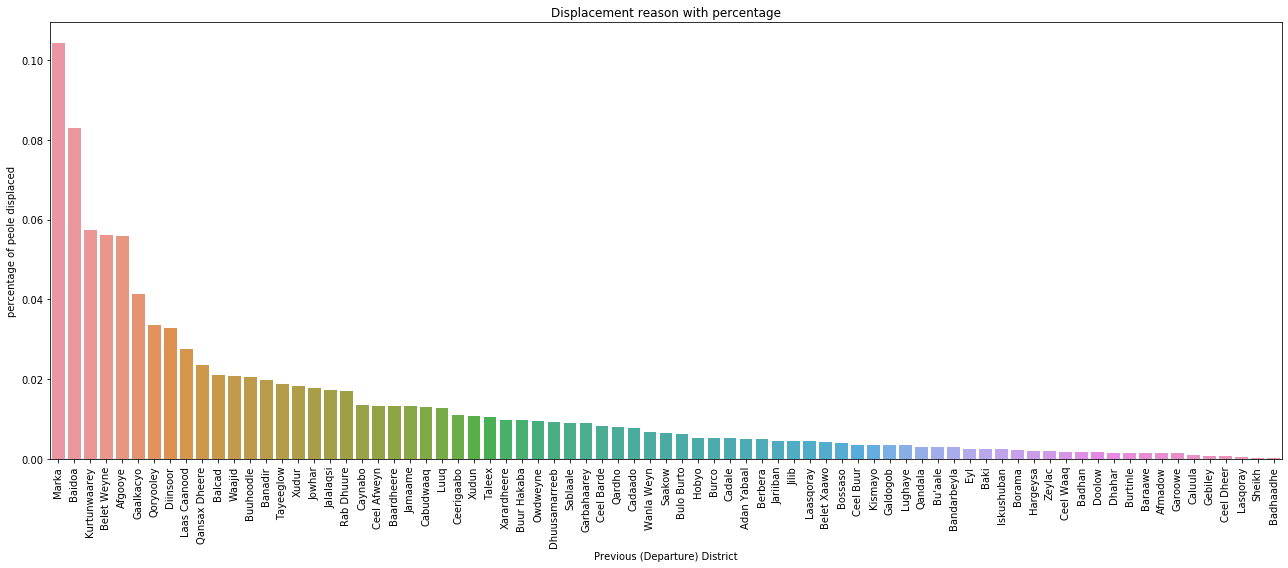

In [13]:
diparture_districts = displacement_df.groupby(['Previous (Departure) District']).sum()['Number of Individuals'].sort_values(ascending=False)
plt.figure(figsize=(18,8))
sns.barplot(diparture_districts.keys(), dipart_dist_percent);
plt.xticks(rotation=90)
plt.ylabel("percentage of peole displaced");
plt.title("Displacement reason with percentage");
plt.tight_layout()

In [14]:
dipart_dist_percent[:5].sum()

0.35636326310937616

#### [sol2]
- 10.4% of total people migrated belongs to marka district.
- 8.29% of total people migrated belongs to Baidoa district.
- 5.73% of total people migrated belongs to Kurtunwaarey
- 5.60% of total people migrated belongs to Belet Weyne. 
- 5.55% of total people migrated belongs to Afgooye.
### 35.6% of total people migrated belongs to the above 5 districts.

### [Q3] To which district most people are migrating to?

In [15]:
displacement_df['Number of Individuals'].sum()

2562231

- There are total 25,62,231 people migrated.

In [16]:
displacement_df.groupby(['Current (Arrival) District'])['Number of Individuals'].sum().sort_values(ascending=False)

Current (Arrival) District
Banadir          590171
Baidoa           378005
Belet Weyne      142884
Gaalkacyo        142534
Laas Caanood     104706
                  ...  
Buur Hakaba         707
Qansax Dheere       630
Sablaale            127
Sheikh              126
Badhaadhe            85
Name: Number of Individuals, Length: 76, dtype: int64

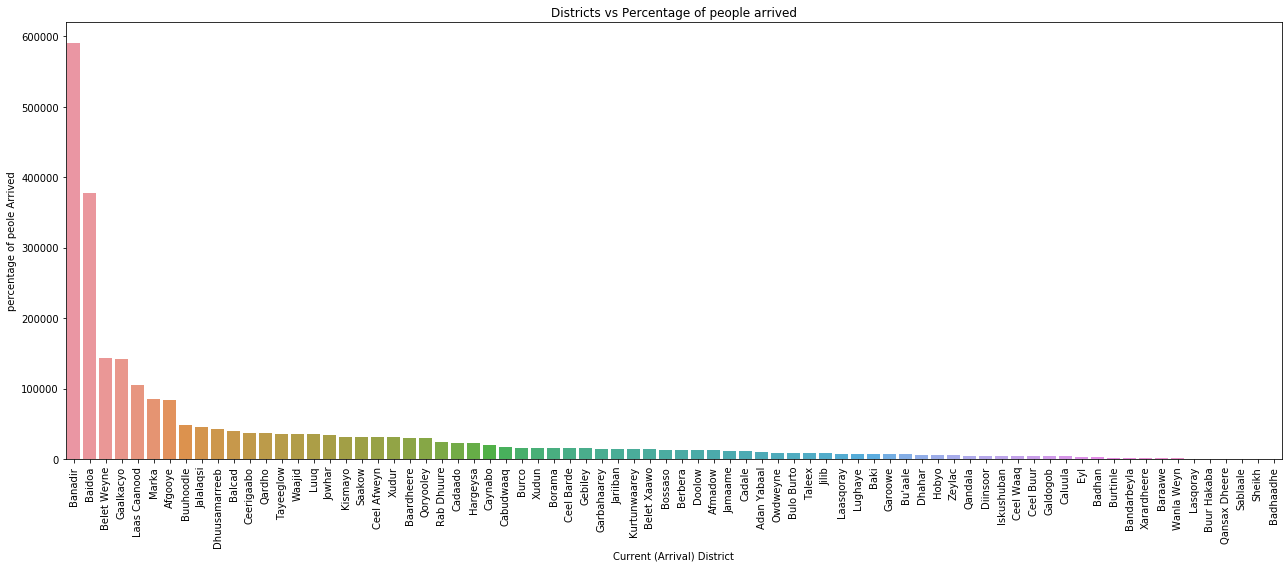

In [54]:
arrival_districts = displacement_df.groupby(['Current (Arrival) District'])['Number of Individuals'].sum().sort_values(ascending=False)
plt.figure(figsize=(18,8))
sns.barplot(arrival_districts.keys(), arrival_districts.values);
plt.xticks(rotation=90)
plt.ylabel("Number of peole Arrived");
plt.title("Districts vs Percentage of people arrived");
plt.tight_layout()

In [18]:
arrival_dist_percent =  arrival_districts.values/arrival_districts.values.sum()

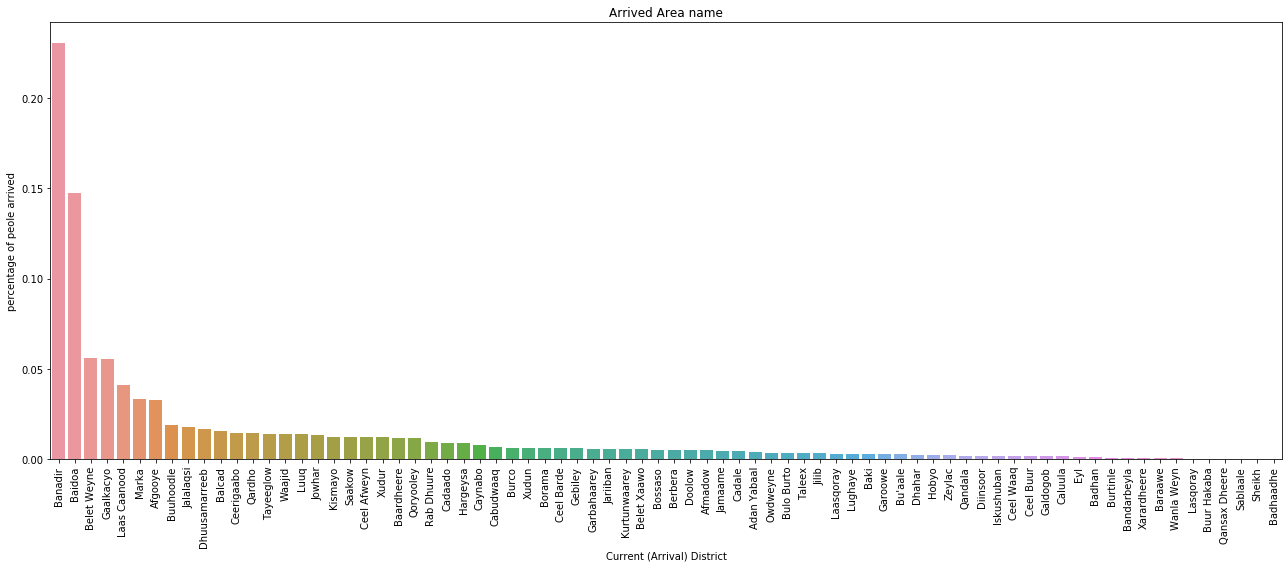

In [19]:
#arrival_districts = displacement_df.groupby(['Current (Arrival) District'])['Number of Individuals'].sum().sort_values(ascending=False)
plt.figure(figsize=(18,8))
sns.barplot(arrival_districts.keys(), arrival_dist_percent);
plt.xticks(rotation=90)
plt.ylabel("percentage of peole arrived");
plt.title("Districts vs Percentage of people arrived.");
plt.tight_layout()

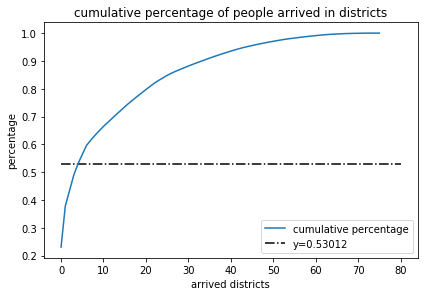

In [50]:
plt.plot(np.cumsum(arrival_dist_percent), label='cumulative percentage');
plt.hlines(0.53012394, xmin=0, xmax=80, linestyles='dashdot', label='y=0.53012');
plt.legend(loc='lower right')
plt.xlabel("arrived districts")
plt.ylabel("percentage")
plt.tight_layout()
plt.title("cumulative percentage of people arrived in districts");

In [52]:
np.cumsum(arrival_dist_percent)

array([0.23033481, 0.37786445, 0.43362991, 0.48925877, 0.53012394,
       0.56345349, 0.59600325, 0.61491333, 0.63241644, 0.64885328,
       0.66452673, 0.67872452, 0.69290513, 0.70702759, 0.72091431,
       0.73477801, 0.7481843 , 0.76064961, 0.7729467 , 0.78496084,
       0.79695429, 0.80863552, 0.82022074, 0.82984321, 0.83891187,
       0.84796141, 0.85588653, 0.86266109, 0.86902118, 0.87531881,
       0.88147165, 0.88741452, 0.89335115, 0.89892441, 0.90448129,
       0.90999445, 0.91538429, 0.92055088, 0.92566361, 0.9304165 ,
       0.9351651 , 0.93982119, 0.94407881, 0.94822364, 0.95184353,
       0.95519452, 0.95853653, 0.96176808, 0.96478694, 0.9677531 ,
       0.97052373, 0.97321592, 0.97580468, 0.97825684, 0.98034174,
       0.98233024, 0.98422898, 0.98597121, 0.98770954, 0.98940299,
       0.99099144, 0.99249833, 0.99393341, 0.9950988 , 0.99606281,
       0.99685821, 0.99756774, 0.99825426, 0.99868396, 0.99906449,
       0.99934627, 0.9996222 , 0.99986808, 0.99991765, 0.99996

#### [Sol3]:
- More than 50% of people migrated are coming to 'Banadir', 'Baidoa', 'Belet Weyne', 'Gaalkacyo', 'Laas Caanood' districts.
- Banadir district is the favorite district to people, nearly 23% of all people migrated arrived to Banadir district.
- Followed by 'Baidoa' with 14.75%.